<a href="https://colab.research.google.com/github/PRAGYAMISHRA04/BASIC-PAGE-RANK-ALGO/blob/master/4th_july_ML_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
print("Imported")

Imported


In [ ]:
data=pd.read_csv("/content/kc_house_data.csv")
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
data=data.drop(['id','date'],axis=1)

In [ ]:
print(data)

          price  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
0      221900.0         3       1.00  ... -122.257           1340        5650
1      538000.0         3       2.25  ... -122.319           1690        7639
2      180000.0         2       1.00  ... -122.233           2720        8062
3      604000.0         4       3.00  ... -122.393           1360        5000
4      510000.0         3       2.00  ... -122.045           1800        7503
...         ...       ...        ...  ...      ...            ...         ...
21608  360000.0         3       2.50  ... -122.346           1530        1509
21609  400000.0         4       2.50  ... -122.362           1830        7200
21610  402101.0         2       0.75  ... -122.299           1020        2007
21611  400000.0         3       2.50  ... -122.069           1410        1287
21612  325000.0         2       0.75  ... -122.299           1020        1357

[21613 rows x 19 columns]


In [ ]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
data['price'].corr(data['sqft_living'])
#First thing a data scientist should do is make sense of data by finding correlations

0.7020350546118003

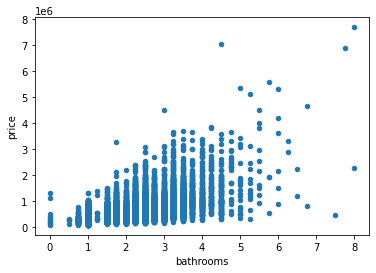

In [ ]:
data.plot.scatter(x='bathrooms',y='price')
# Scatter plot is just plotting all data points

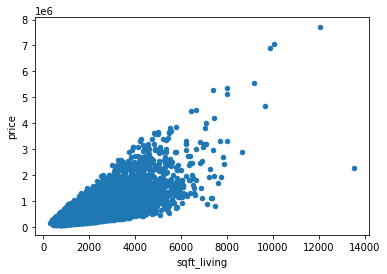

In [ ]:
data.plot.scatter(x='sqft_living',y='price')
# We can see from graph it will help to determine price

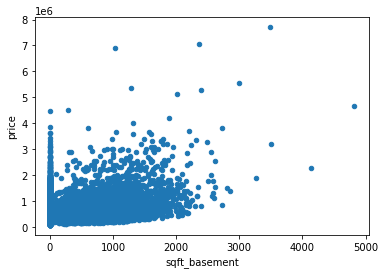

In [ ]:
''' The slope almost gives us the line the bias/intercept can move it up and down'''
data.plot.scatter(x='sqft_basement',y='price')

In [ ]:
data['price'].corr(data['sqft_basement'])

0.3238160207119833

In [ ]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
X=data.iloc[:,1:].values
Y=data.iloc[:,:1].values
Y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=1/3)


In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model=sm.OLS(y_train,X_train).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.904
Method:                 Least Squares   F-statistic:                              7997.
Date:                Fri, 09 Oct 2020   Prob (F-statistic):                        0.00
Time:                        21:01:19   Log-Likelihood:                     -1.9646e+05
No. Observations:               14408   AIC:                                  3.929e+05
Df Residuals:                   14391   BIC:                                  3.931e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3.484e+04   2283.949    -15.253      0.000   -3.93e+04   -3.04e+04
x2          4.218e+04   4004.197     10.535      0.000    3.43e+04       5e+04
x3           110.6089      2.804     39.450      0.000     105.113     116.105
x4             0.1568      0.061      2.557      0.011       0.037       0.277
x5          2498.2705   4331.724      0.577      0.564   -5992.466     1.1e+04
x6            6.2e+05   2.17e+04     28.528      0.000    5.77e+05    6.63e+05
x7          5.227e+04   2628.898     19.881      0.000    4.71e+04    5.74e+04
x8          2.643e+04   2872.861      9.199      0.000    2.08e+04    3.21e+04
x9          9.491e+04   2643.215     35.908      0.000    8.97e+04       1e+05
x10           72.0116      2.736     26.324      0.000      66.650      77.374
x11           38.5973      3.242     11.905      0.000      32.242      44.952
x12        -2521.8699     83.682    -30.136      0.000   -2685.897   -2357.843
x13           16.7642      4.553      3.682      0.000       7.839      25.690
x14         -525.8061     21.805    -24.113      0.000    -568.548    -483.065
x15         5.999e+05   1.32e+04     45.472      0.000    5.74e+05    6.26e+05
x16        -2.236e+05    1.6e+04    -13.993      0.000   -2.55e+05   -1.92e+05
x17           22.7743      4.166      5.466      0.000      14.608      30.941
x18           -0.3754      0.090     -4.163      0.000      -0.552      -0.199
==============================================================================
Omnibus:                    12335.522   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1212187.127
Skew:                           3.611   Prob(JB):                         0.00
Kurtosis:                      47.351   Cond. No.                     4.46e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.34e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
guess_y=model.predict(X_test)
guess_y[:6]

array([101702.16747561, 133436.22632822, 361451.43987215, 406061.13475571,
       160842.52246077, 103276.5105439 ])

In [ ]:
y_test[0]

array([226750.])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(guess_y,y_test) 

39815179873.52552

In [ ]:
''' The R-squared value gives value for how much the variable y is explained by the feature we chose'''

' The R-squared value gives value for how much the variable y is explained by the feature we chose'

In [ ]:
data=data.drop(['zipcode'],axis=1)


In [ ]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
CORR={}
for i in data.columns:
  CORR[i]=data['price'].corr(data[str(i)])
  print(str(i),"                ",data['price'].corr(data[str(i)]))

price                  0.9999999999999999
bedrooms                  0.308349598145638
bathrooms                  0.525137505413962
sqft_living                  0.7020350546118003
sqft_lot                  0.08966086058710017
floors                  0.2567938875507184
waterfront                  0.26636943403060226
view                  0.39729348829450495
condition                  0.03636178912899747
grade                  0.6674342560202365
sqft_above                  0.6055672983560781
sqft_basement                  0.3238160207119833
yr_built                  0.05401153149479269
yr_renovated                  0.12643379344089314
lat                  0.3070034799952186
long                  0.02162624103930587
sqft_living15                  0.5853789035795679
sqft_lot15                  0.08244715251948599


# New section

In [ ]:
for key,value in CORR.items():
   if value<0.3:
      data.drop(str(key),axis=1)